# How to use CGM model interface

In [1]:
from astropy import units as un, constants as cons
import numpy as np
import matplotlib.pyplot as plt
import cgm_model_interface as CMI

# Cooling module

In [2]:
#this example initializes cooling module for the collisional ionisation equilibrium
import CloudyCooling as CC
cooling = CC.CIE()

# Halo potential

In [3]:
#this example initializes an NFW potential
import HaloPotential as Halo
z=0.01
Mvir=2e13*un.M_sun
cvir=5
potential = Halo.NFW(Mvir=Mvir,z=z,cvir=cvir)

# Boundary conditions module

In [4]:
#setting boundary conditions
import Boundary as BC
Rout=[300]*un.kpc #outer boundary
Tout=[0.2]*un.keV #temperature boundary condition
boundary = BC.Boundary(Rout=Rout,T=Tout)

# Metallicity module

In [5]:
# this example initializes the power law metallicity profile
import Metallicity as Metal
metallicity = Metal.Uniform_Metallicity(Zuniform=0.3)
#metallicity = Metal.PowerLaw_Metallicity(Rcore=100*un.kpc,Zcore=0.3,slope=0.2)

# Precipitation model

In [6]:
#this example initializes precipitation-limited NFW model
import PrecipitationModel as Precipitation
tcool_tff=20
precipitation = Precipitation.pNFW(potential=potential,cooling=cooling,metallicity=
                                   metallicity,boundary=boundary,
                                   tcool_tff=tcool_tff,z=z)

# Plotting results 

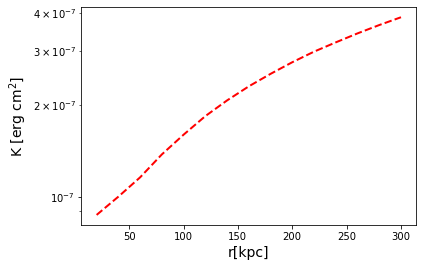

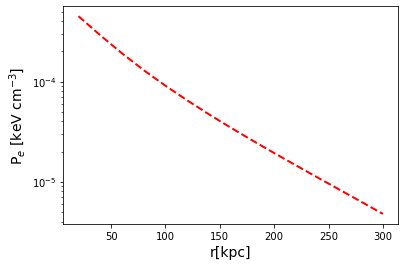

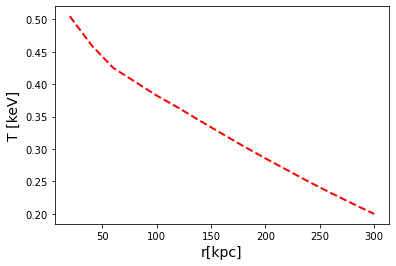

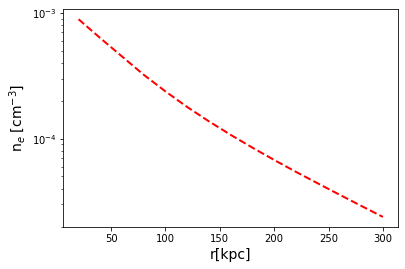

In [7]:
r=np.linspace(20,300,15)*un.kpc

#entropy profile
plt.plot(r,precipitation.get_entropy_profile(r),'r--',lw=2)
plt.xlabel(r'r[kpc]',fontsize=14)
plt.ylabel(r'K [erg $\rm cm^2$]',fontsize=14)
plt.yscale('log')
plt.show()

#pressure profile
plt.plot(r,precipitation.get_electron_thermal_pressure_profile(r).to('keV/cm**3'),
         'r--',lw=2)
plt.xlabel(r'r[kpc]',fontsize=14)
plt.ylabel(r'P$_e$ [keV $\rm cm^{-3}$]',fontsize=14)
plt.yscale('log')
plt.show()

#temperature density profile
plt.plot(r,precipitation.get_temperature_profile(r),'r--',lw=2)
plt.xlabel(r'r[kpc]',fontsize=14)
plt.ylabel(r'T [keV]',fontsize=14)
plt.show()

#electron density profile
plt.plot(r,precipitation.get_electron_density_profile(r),'r--',lw=2)
plt.xlabel(r'r[kpc]',fontsize=14)
plt.ylabel(r'n$_e$ [$\rm cm^{-3}$]',fontsize=14)
plt.yscale('log')
plt.show()